<a href="https://colab.research.google.com/github/IamBhanuYenumula/Byen_DataScience_expo/blob/main/Exhaustive_feature_wrapper_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification problem using "Exhaustive feature selection"

In [22]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd


In [23]:
pip install --upgrade scikit-learn mlxtend

In [24]:
url="https://raw.githubusercontent.com/IamBhanuYenumula/Byen_DataScience_expo/main/Datasets/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [25]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
lr = LogisticRegression()
sel=EFS(lr, max_features=4,scoring='accuracy',cv=5)

In [26]:
model=sel.fit(df.iloc[:,:4],df['variety'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  method="L-BFGS-B",
Features: 15/15

In [27]:
model.best_score_

0.9733333333333334

In [28]:
model.best_feature_names_

('sepal.length', 'sepal.width', 'petal.length', 'petal.width')

In [29]:
# detailed output to check all the subsets
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': 0.7533333333333333,
  'feature_names': ('sepal.length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.56666667, 0.63333333]),
  'avg_score': 0.5666666666666667,
  'feature_names': ('sepal.width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.9533333333333334,
  'feature_names': ('petal.length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.96,
  'feature_names': ('petal.width',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.86666667]),
  'avg_score': 0.8133333333333332,
  'feature_names': ('sepal.length', 'sepal.width')},
 5: {'feature_idx': (0, 2),
  'cv_scores': array([0.93333333, 1.        , 0.9   

In [30]:
# to convert this info into a dataframe
metric_df = pd.DataFrame.from_dict(model.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal.length,)",0.069612,0.05416,0.02708
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.566667,"(sepal.width,)",0.046932,0.036515,0.018257
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal.length,)",0.051412,0.04,0.02
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal.width,)",0.049963,0.038873,0.019437
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.813333,"(sepal.length, sepal.width)",0.069612,0.05416,0.02708
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal.length, petal.length)",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal.length, petal.width)",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal.width, petal.length)",0.051412,0.04,0.02
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal.width, petal.width)",0.032061,0.024944,0.012472
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal.length, petal.width)",0.032061,0.024944,0.012472


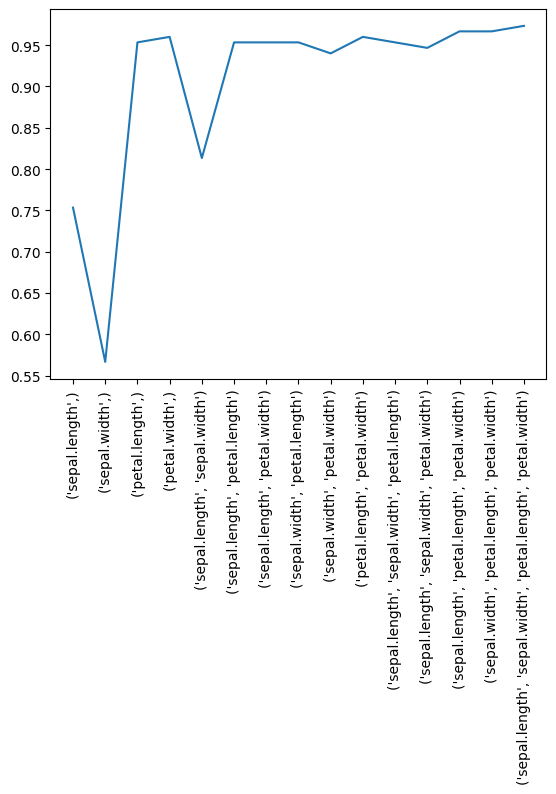

In [31]:
import matplotlib.pyplot as plt
plt.plot([str(k) for k in metric_df['feature_names']],metric_df['avg_score'])
plt.xticks(rotation=90)
plt.show()

# Regression problem using "Exhaustive feature selection"

In [32]:
url2="https://raw.githubusercontent.com/IamBhanuYenumula/Byen_DataScience_expo/main/Datasets/BostonHousing.csv"

In [33]:
df = pd.read_csv(url2)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df['medv'],test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


Lets try to do a baseline model train : (before applying any featrure selection)

In [35]:
# scaling the data before doing baseline model

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [36]:
# baseline model
import numpy as np
from sklearn.metrics import r2_score
model=LinearRegression()

print('training', np.mean(cross_val_score(model,X_train,y_train,cv=5,scoring='r2')))
print('testing', np.mean(cross_val_score(model,X_test,y_test,cv=5,scoring='r2')))


training 0.7244357342240263
testing 0.5451790940964922


In [40]:
lr = LinearRegression()
exh = EFS(lr, max_features=13, scoring='r2', cv=10, print_progress=True, n_jobs=1)
sel = exh.fit(X_train,y_train)

Features: 8191/8191

In [42]:
sel.best_score_

0.7021432332186084

In [43]:
sel.best_feature_names_

('0', '3', '4', '5', '7', '8', '9', '10', '11', '12')

In [44]:
# converting it to dataframe
metric_df=pd.DataFrame.from_dict(sel.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.06187201349312821, 0.21695752952290714, 0.1...",0.1113,"(0,)",0.068626,0.092399,0.0308
1,"(1,)","[-0.06909411223332595, 0.06378364489046906, 0....",0.080141,"(1,)",0.043549,0.058635,0.019545
2,"(2,)","[0.2581400495130044, 0.24192652096087108, 0.15...",0.197438,"(2,)",0.056161,0.075616,0.025205
3,"(3,)","[-0.06519180407233627, -0.1157077091040255, 0....",0.002908,"(3,)",0.057893,0.077949,0.025983
4,"(4,)","[0.18831320204786572, 0.15611671149828166, 0.1...",0.15303,"(4,)",0.053874,0.072536,0.024179
...,...,...,...,...,...,...,...
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7903768760758776, 0.7978748201943938, 0.742...",0.698955,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.110196,0.14837,0.049457
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7793809319729097, 0.7920049721169651, 0.753...",0.699647,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.115985,0.156164,0.052055
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7802485152933578, 0.8031632921683025, 0.754...",0.698545,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.117601,0.15834,0.05278
8189,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.78515293060139, 0.7726604948432468, 0.74943...",0.69279,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.116607,0.157001,0.052334


In [45]:
# taking out adjusted R2 score
def adjust_r2(r2, num_examples, num_features):
  coef = (num_examples - 1)/(num_examples - num_features -1)
  return 1 - (1-r2)*coef

In [48]:
metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

In [49]:
metric_df.sort_values('adjusted_r2', ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
7590,"(0, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7948781300135751, 0.8126032997049035, 0.740...",0.701604,"(0, 4, 5, 7, 8, 9, 10, 11, 12)",0.109782,0.147812,0.049271,404,9,0.694787
8029,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7853673828678087, 0.8068527620446221, 0.753...",0.702143,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.115758,0.155859,0.051953,404,10,0.694564
7975,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7916866437250347, 0.8002117305356404, 0.740...",0.701376,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.108014,0.145431,0.048477,404,10,0.693777
8150,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7824493530648428, 0.7949109285480958, 0.753...",0.702035,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.114302,0.153898,0.051299,404,11,0.693673
7566,"(0, 3, 4, 5, 7, 8, 10, 11, 12)","[0.7682279280336336, 0.8030267188370754, 0.762...",0.700389,"(0, 3, 4, 5, 7, 8, 10, 11, 12)",0.119573,0.160996,0.053665,404,9,0.693545
...,...,...,...,...,...,...,...,...,...,...
1,"(1,)","[-0.06909411223332595, 0.06378364489046906, 0....",0.080141,"(1,)",0.043549,0.058635,0.019545,404,1,0.077853
30,"(1, 7)","[-0.06763615312808446, 0.06933915753701936, 0....",0.077769,"(1, 7)",0.043101,0.058032,0.019344,404,2,0.07317
49,"(3, 7)","[-0.050810320515409346, -0.0428493008893589, 0...",0.065037,"(3, 7)",0.066554,0.089609,0.02987,404,2,0.060374
7,"(7,)","[-0.020714728360076817, 0.06907241897075378, 0...",0.036859,"(7,)",0.036497,0.04914,0.01638,404,1,0.034463


In [50]:
X_train_sel=sel.transform(X_train)
X_test_sel=sel.transform(X_test)

In [63]:
print(pd.DataFrame(X_train_sel).columns)
print(pd.DataFrame(X_test_sel).columns)

RangeIndex(start=0, stop=10, step=1)
RangeIndex(start=0, stop=10, step=1)


In [62]:
model=LinearRegression()
print("training", np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing", np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7261221606129598
testing 0.5246730606335535
